<a href="https://colab.research.google.com/github/dduniverse/DF/blob/main/2nd%20project/%EC%A0%84%EC%A3%BC%EA%B2%BD%EC%A3%BC%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# 전체 500위 데이터

In [ ]:
rank = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/네비게이션 검색순위/전체.xlsx')
rank

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,스타필드하남,경기도,하남시,경기 하남시 미사대로 750-0,쇼핑,쇼핑몰,10528116
1,2,인천국제공항제1여객터미널,인천광역시,중구,인천 중구 공항로 272-0,기타관광,교통시설,7354349
2,3,김포국제공항국내선,서울특별시,강서구,서울 강서구 하늘길 111-0,기타관광,교통시설,4883755
3,4,스타필드고양,경기도,고양시 덕양구,경기 고양시 덕양구 고양대로 1955-0,쇼핑,쇼핑몰,3834697
4,5,인천국제공항제2여객터미널,인천광역시,중구,인천 중구 제2터미널대로 446-0,기타관광,교통시설,3617603
...,...,...,...,...,...,...,...,...
495,496,LF스퀘어광양점,전라남도,광양시,전남 광양시 순광로 466-0,쇼핑,쇼핑몰,359282
496,497,쇠소깍,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 128-0,기타관광,기타관광,358423
497,498,장호항,강원도,삼척시,강원 삼척시 장호항길 103-0,자연관광,자연경관(하천/해양),357739
498,499,홈플러스인천송도점,인천광역시,연수구,인천 연수구 송도국제대로 165-0,쇼핑,대형마트,357616


## 주소 전처리

### 1. 시/군/구 컬럼에서 큰 단위만 남김
ex) 전주시 완산구 -> 전주시

In [ ]:
rank['시/군/구'].str.split().str[0]

0       하남시
1        중구
2       강서구
3       고양시
4        중구
       ... 
495     광양시
496    서귀포시
497     삼척시
498     연수구
499     양평군
Name: 시/군/구, Length: 500, dtype: object

In [ ]:
rank['시/군/구'] = rank['시/군/구'].str.split().str[0]  # 시군구 컬럼을 큰 단위만 남김 (ex. 시군 -> 시)
rank

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,스타필드하남,경기도,하남시,경기 하남시 미사대로 750-0,쇼핑,쇼핑몰,10528116
1,2,인천국제공항제1여객터미널,인천광역시,중구,인천 중구 공항로 272-0,기타관광,교통시설,7354349
2,3,김포국제공항국내선,서울특별시,강서구,서울 강서구 하늘길 111-0,기타관광,교통시설,4883755
3,4,스타필드고양,경기도,고양시,경기 고양시 덕양구 고양대로 1955-0,쇼핑,쇼핑몰,3834697
4,5,인천국제공항제2여객터미널,인천광역시,중구,인천 중구 제2터미널대로 446-0,기타관광,교통시설,3617603
...,...,...,...,...,...,...,...,...
495,496,LF스퀘어광양점,전라남도,광양시,전남 광양시 순광로 466-0,쇼핑,쇼핑몰,359282
496,497,쇠소깍,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 128-0,기타관광,기타관광,358423
497,498,장호항,강원도,삼척시,강원 삼척시 장호항길 103-0,자연관광,자연경관(하천/해양),357739
498,499,홈플러스인천송도점,인천광역시,연수구,인천 연수구 송도국제대로 165-0,쇼핑,대형마트,357616


### 2. 광역시/도 + 시/군/구 형태의 `주소` 컬럼 생성
ex) 전라북도 + 전주시 -> 전라북도 전주시

In [ ]:
rank['주소'] = rank['광역시/도'] + ' ' + rank['시/군/구']
rank

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,주소
0,1,스타필드하남,경기도,하남시,경기 하남시 미사대로 750-0,쇼핑,쇼핑몰,10528116,경기도 하남시
1,2,인천국제공항제1여객터미널,인천광역시,중구,인천 중구 공항로 272-0,기타관광,교통시설,7354349,인천광역시 중구
2,3,김포국제공항국내선,서울특별시,강서구,서울 강서구 하늘길 111-0,기타관광,교통시설,4883755,서울특별시 강서구
3,4,스타필드고양,경기도,고양시,경기 고양시 덕양구 고양대로 1955-0,쇼핑,쇼핑몰,3834697,경기도 고양시
4,5,인천국제공항제2여객터미널,인천광역시,중구,인천 중구 제2터미널대로 446-0,기타관광,교통시설,3617603,인천광역시 중구
...,...,...,...,...,...,...,...,...,...
495,496,LF스퀘어광양점,전라남도,광양시,전남 광양시 순광로 466-0,쇼핑,쇼핑몰,359282,전라남도 광양시
496,497,쇠소깍,제주특별자치도,서귀포시,제주 서귀포시 쇠소깍로 128-0,기타관광,기타관광,358423,제주특별자치도 서귀포시
497,498,장호항,강원도,삼척시,강원 삼척시 장호항길 103-0,자연관광,자연경관(하천/해양),357739,강원도 삼척시
498,499,홈플러스인천송도점,인천광역시,연수구,인천 연수구 송도국제대로 165-0,쇼핑,대형마트,357616,인천광역시 연수구


## 각 주소지 별 관광지의 개수 확인

In [ ]:
rank['주소'].value_counts()

경기도 수원시       19
경기도 용인시       19
경기도 고양시       15
서울특별시 영등포구    10
경기도 파주시       10
              ..
전라남도 구례군       1
서울특별시 도봉구      1
부산광역시 서구       1
대구광역시 수성구      1
전라남도 광양시       1
Name: 주소, Length: 136, dtype: int64

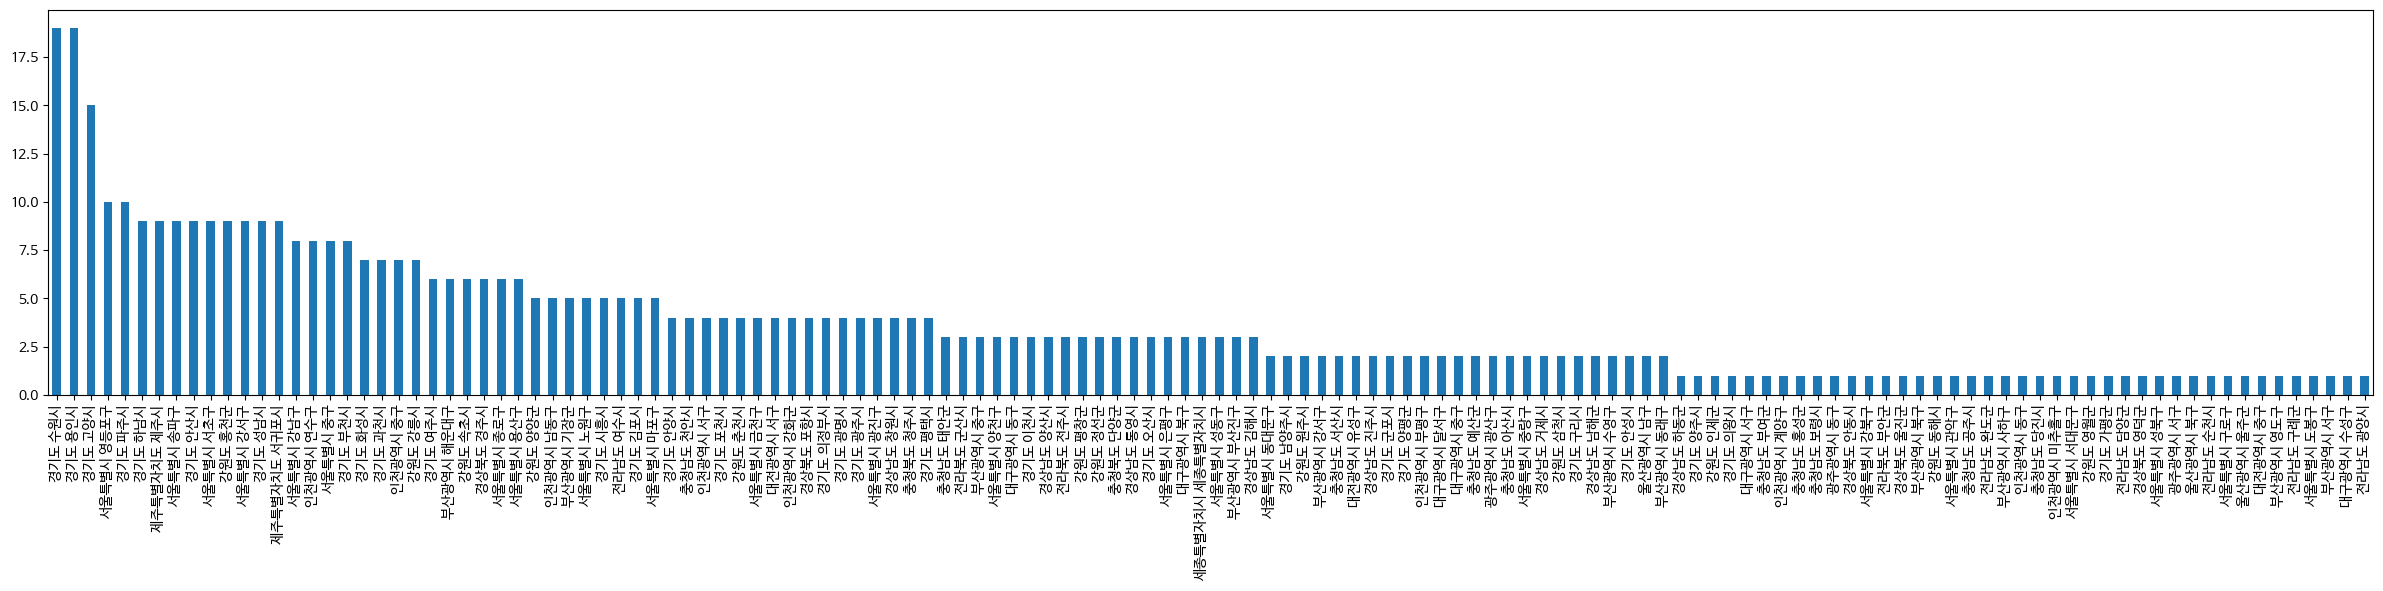

In [ ]:
plt.figure(figsize=(30, 5))
rank['주소'].value_counts().plot(kind='bar')
plt.show()

'전체' 데이터에서 주소별 관광지 개수를 살펴보았을 때
- `경기도 수원시`, `경기도 용인시`, `경기도 고양시`의 많은 관광지가 네비게이션에서 많이 검색되었음을 알 수 있음
- `전라북도 전주시`는 전주한옥마을, 전주월드컵경기장, 롯데백화점전주점 3개의 관광지가 500위 안에 랭크 되어 있음

## 전주시와 경주시의 관광지 수 비교

In [ ]:
rank[rank['주소'] == '전라북도 전주시']  # 전주시는 3개

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,주소
47,48,전주한옥마을,전라북도,전주시,전북 전주시 완산구 기린대로 99-0,역사관광,역사유적지,1474491,전라북도 전주시
219,220,전주월드컵경기장,전라북도,전주시,전북 전주시 덕진구 기린대로 1055-0,문화관광,레저스포츠시설,620410,전라북도 전주시
436,437,롯데백화점전주점,전라북도,전주시,전북 전주시 완산구 온고을로 2-0,쇼핑,백화점,386886,전라북도 전주시


In [ ]:
rank[rank['주소'] == '경상북도 경주시']  # 경주시는 6개

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,주소
112,113,불국사,경상북도,경주시,경북 경주시 불국로 385-0,역사관광,종교성지,954336,경상북도 경주시
160,161,첨성대,경상북도,경주시,경북 경주시 첨성로 140-25,역사관광,역사유적지,757114,경상북도 경주시
203,204,동궁과월지,경상북도,경주시,경북 경주시 원화로 102-0,역사관광,역사유적지,649604,경상북도 경주시
283,284,보문관광단지,경상북도,경주시,경북 경주시 보문로 424-33,문화관광,복합관광시설,526288,경상북도 경주시
326,327,경주월드,경상북도,경주시,경북 경주시 보문로 544-0,문화관광,테마공원,472841,경상북도 경주시
472,473,석굴암,경상북도,경주시,경북 경주시 석굴로 238-0,역사관광,역사유적지,368804,경상북도 경주시


`전주시`의 경쟁 도시라고 생각되었던 `경주시`는 전주시의 2배인 6개의 관광지가 500위 안에 존재함

# 관광 데이터(자연, 역사, 체험, 문화, 기타)
쇼핑, 음식, 숙박을 제외한 자연, 역사, 체험, 문화, 기타 각각 500개의 데이터(총 2500개)에서 전주와 경주 비교

## 5개의 데이터를 하나의 데이터로 연결

In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/네비게이션 검색순위/자연관광.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/네비게이션 검색순위/역사관광.xlsx')
data3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/네비게이션 검색순위/체험관광.xlsx')
data4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/네비게이션 검색순위/문화관광.xlsx')
data5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/네비게이션 검색순위/기타관광.xlsx')

In [ ]:
data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)  
data

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,을왕리해수욕장,인천광역시,중구,인천 중구 을왕로 52-0,자연관광,자연경관(하천/해양),1783820
1,2,속초해변,강원도,속초시,강원 속초시 해오름로 186-0,자연관광,자연경관(하천/해양),1421031
2,3,안목해변,강원도,강릉시,강원 강릉시 창해로14번길 20-1,자연관광,자연경관(하천/해양),1416886
3,4,주문진항,강원도,강릉시,강원 강릉시 해안로 1758-14,자연관광,자연경관(하천/해양),1085222
4,5,해운대해수욕장,부산광역시,해운대구,부산 해운대구 해운대해변로 264-0,자연관광,자연경관(하천/해양),1073161
...,...,...,...,...,...,...,...,...
2495,496,유채꽃프라자,제주특별자치도,서귀포시,제주 서귀포시 녹산로 464-65,기타관광,기타관광,21674
2496,497,맷돌포선착장,충청남도,당진시,충남 당진시 맷돌포길 0-0,기타관광,교통시설,21601
2497,498,적벽강,충청남도,금산군,충남 금산군,기타관광,기타관광,21588
2498,499,탄현역,경기도,고양시 일산서구,경기 고양시 일산서구 경의로 856-0,기타관광,교통시설,21568


- 순위 컬럼은 DataFrame의 인덱스와 같은 의미를 가지므로 `drop`
- 순위를 인덱스로 유지할 수 있도록 검색건수를 내림차순으로 정렬 후 `reset_index`

In [ ]:
data = data.drop(columns=['순위'])
data = data.sort_values(by=['검색건수'], ascending=False).reset_index(drop=True)
data

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,인천국제공항제1여객터미널,인천광역시,중구,인천 중구 공항로 272-0,기타관광,교통시설,7354349
1,김포국제공항국내선,서울특별시,강서구,서울 강서구 하늘길 111-0,기타관광,교통시설,4883755
2,인천국제공항제2여객터미널,인천광역시,중구,인천 중구 제2터미널대로 446-0,기타관광,교통시설,3617603
3,에버랜드,경기도,용인시 처인구,경기 용인시 처인구 에버랜드로 199-0,문화관광,테마공원,3263924
4,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,2723304
...,...,...,...,...,...,...,...
2495,송추팜,경기도,양주시,경기 양주시 석굴암길 1-39,체험관광,농/산/어촌체험,1207
2496,물미연꽃마을,경기도,가평군,경기 가평군 미사리로645번길 185-90,체험관광,농/산/어촌체험,1206
2497,울미연꽃마을연화정체험관,경기도,포천시,경기 포천시 꽃배산길 86-0,체험관광,농/산/어촌체험,1205
2498,햇살들주말농장,경기도,평택시,경기 평택시 홍원농깨길 119-32,체험관광,농/산/어촌체험,1199


## 주소 전처리 및 주소지별 관광지의 개수 시각화
전체 데이터와 같은 방식

In [ ]:
data['시/군/구'] = data['시/군/구'].str.split().str[0]
data['주소'] = data['광역시/도'] + ' ' + data['시/군/구']
data

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,주소
0,인천국제공항제1여객터미널,인천광역시,중구,인천 중구 공항로 272-0,기타관광,교통시설,7354349,인천광역시 중구
1,김포국제공항국내선,서울특별시,강서구,서울 강서구 하늘길 111-0,기타관광,교통시설,4883755,서울특별시 강서구
2,인천국제공항제2여객터미널,인천광역시,중구,인천 중구 제2터미널대로 446-0,기타관광,교통시설,3617603,인천광역시 중구
3,에버랜드,경기도,용인시,경기 용인시 처인구 에버랜드로 199-0,문화관광,테마공원,3263924,경기도 용인시
4,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,2723304,제주특별자치도 제주시
...,...,...,...,...,...,...,...,...
2495,송추팜,경기도,양주시,경기 양주시 석굴암길 1-39,체험관광,농/산/어촌체험,1207,경기도 양주시
2496,물미연꽃마을,경기도,가평군,경기 가평군 미사리로645번길 185-90,체험관광,농/산/어촌체험,1206,경기도 가평군
2497,울미연꽃마을연화정체험관,경기도,포천시,경기 포천시 꽃배산길 86-0,체험관광,농/산/어촌체험,1205,경기도 포천시
2498,햇살들주말농장,경기도,평택시,경기 평택시 홍원농깨길 119-32,체험관광,농/산/어촌체험,1199,경기도 평택시


In [ ]:
data['주소'].value_counts()

제주특별자치도 서귀포시    82
제주특별자치도 제주시     73
충청남도 태안군        50
경기도 화성시         46
경상남도 창원시        44
                ..
대구광역시 남구         1
인천광역시 동구         1
서울특별시 금천구        1
충청북도 증평군         1
강원도 화천군          1
Name: 주소, Length: 225, dtype: int64

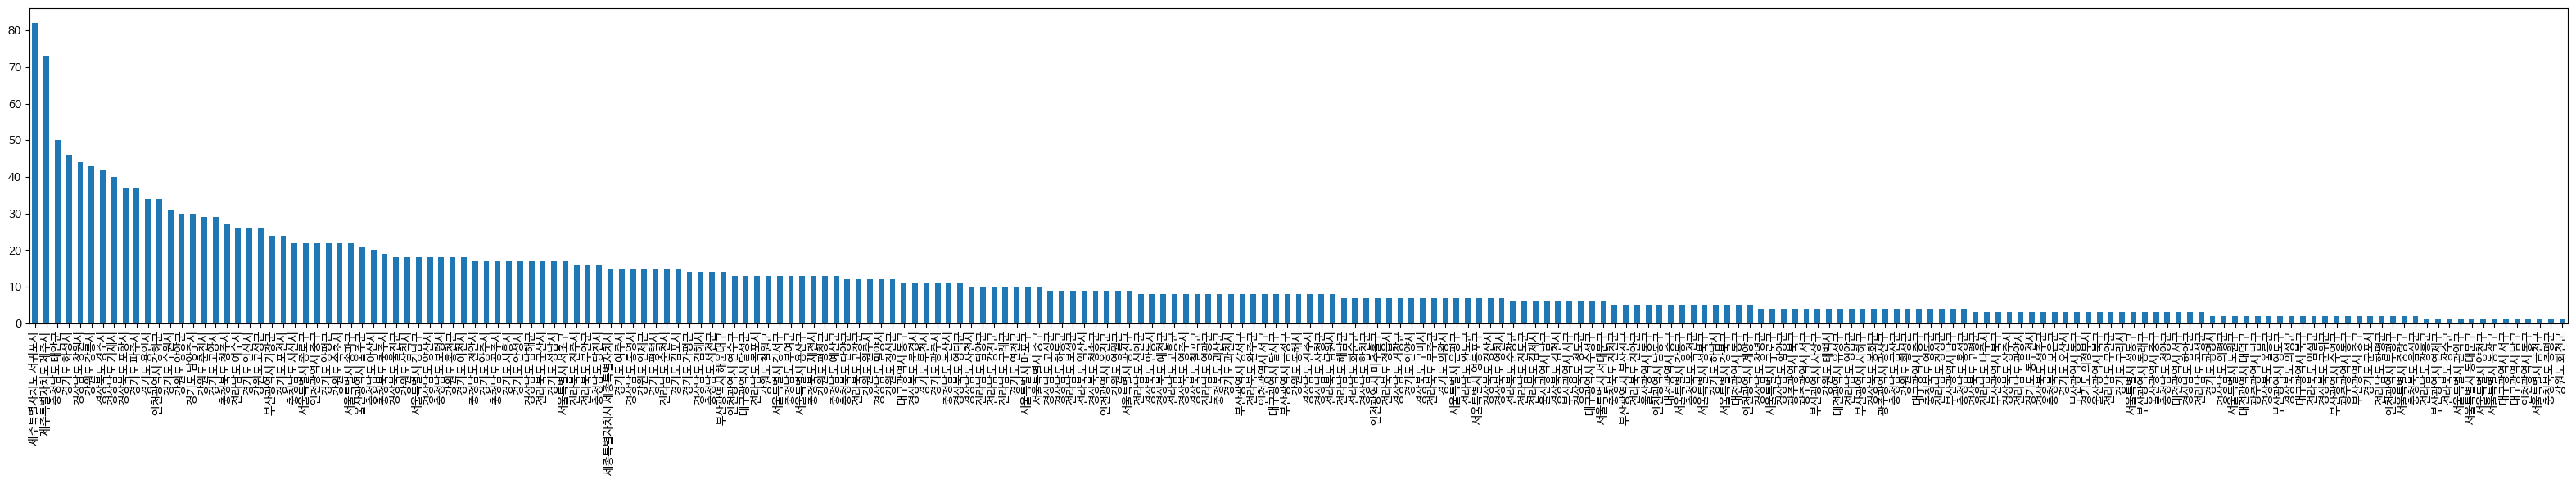

In [ ]:
plt.figure(figsize=(40, 5))
data['주소'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data['주소'].value_counts().loc['전라북도 전주시']

16

In [ ]:
data['주소'].value_counts().loc['경상북도 경주시']

42

관광 데이터(자연, 역사, 체험, 문화, 기타) 2500개 중 `전라북도 전주시`는 16개, `경상북도 경주시`는 42개의 관광지가 존재함

## 전주시와 경주시 비교

In [ ]:
data[data['주소'] == '전라북도 전주시']

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,주소
12,전주한옥마을,전라북도,전주시,전북 전주시 완산구 기린대로 99-0,역사관광,역사유적지,1474491,전라북도 전주시
76,전주월드컵경기장,전라북도,전주시,전북 전주시 덕진구 기린대로 1055-0,문화관광,레저스포츠시설,620410,전라북도 전주시
265,전주동물원,전라북도,전주시,전북 전주시 덕진구 소리로 68-0,문화관광,테마공원,276986,전라북도 전주시
309,한국도로공사 수목원,전라북도,전주시,전북 전주시 덕진구,자연관광,자연공원,245800,전라북도 전주시
392,CGV전주고사,전라북도,전주시,전북 전주시 완산구 전주객사3길 72-0,문화관광,공연시설,206565,전라북도 전주시
541,전주덕진공원,전라북도,전주시,전북 전주시 덕진구 권삼득로 390-0,문화관광,도시공원,159194,전라북도 전주시
815,풍패지관,전라북도,전주시,전북 전주시 완산구 충경로 59-0,역사관광,역사유적지,106290,전라북도 전주시
950,국립전주박물관,전라북도,전주시,전북 전주시 완산구 쑥고개로 249-0,문화관광,전시시설,92806,전라북도 전주시
1207,전주역,전라북도,전주시,전북 전주시 덕진구 동부대로 680-0,기타관광,교통시설,67409,전라북도 전주시
1246,아중호수,전라북도,전주시,전북 전주시 덕진구,자연관광,자연경관(하천/해양),62279,전라북도 전주시


In [ ]:
data[data['주소'] == '경상북도 경주시']

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,주소
35,불국사,경상북도,경주시,경북 경주시 불국로 385-0,역사관광,종교성지,954336,경상북도 경주시
54,첨성대,경상북도,경주시,경북 경주시 첨성로 140-25,역사관광,역사유적지,757114,경상북도 경주시
74,동궁과월지,경상북도,경주시,경북 경주시 원화로 102-0,역사관광,역사유적지,649604,경상북도 경주시
103,보문관광단지,경상북도,경주시,경북 경주시 보문로 424-33,문화관광,복합관광시설,526288,경상북도 경주시
119,경주월드,경상북도,경주시,경북 경주시 보문로 544-0,문화관광,테마공원,472841,경상북도 경주시
178,석굴암,경상북도,경주시,경북 경주시 석굴로 238-0,역사관광,역사유적지,368804,경상북도 경주시
206,국립경주박물관,경상북도,경주시,경북 경주시 일정로 186-0,문화관광,전시시설,330374,경상북도 경주시
231,대릉원,경상북도,경주시,경북 경주시,역사관광,역사유적지,308179,경상북도 경주시
374,경주양남주상절리,경상북도,경주시,경북 경주시,기타관광,기타관광,215564,경상북도 경주시
532,문무대왕릉,경상북도,경주시,경북 경주시,역사관광,역사유적지,160505,경상북도 경주시


전라북도 전주시와 경상북도 경주시만 추출

In [ ]:
compare = data[(data['주소'] == '전라북도 전주시') | (data['주소'] == '경상북도 경주시')]

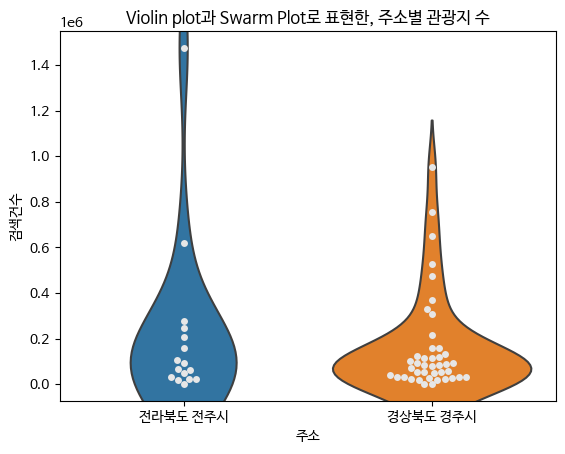

In [ ]:
plt.title("Violin plot과 Swarm Plot로 표현한, 주소별 관광지 수")
sns.violinplot(x="주소", y="검색건수", data=compare, inner=None)
sns.swarmplot(x="주소", y="검색건수", data=compare, color="0.9")
plt.show()

전라북도 전주시
- 전주한옥마을이 다른 관광지 보다 매우 큰 검색건수를 보임
- 그에 반해, 다른 관광지들은 비슷한 검색건수를 보임

경상북도 경주시
- 전주한옥마을을 제외한 다른 전주시의 관광지보다 높은 검색건수를 보임
- 전주시보다 많은 관광지들이 비슷한 검색건수를 보임

### 상위 300위에 존재하는 관광지 확인
상위 300위에 관광지가 몇 개씩 존재하는지 확인하기 위해 300위의 검색건수 확인
- 300위, 서울동물원, 경기도 과천시, 250342건

In [ ]:
data.iloc[300]

관광지명                      서울동물원
광역시/도                       경기도
시/군/구                       과천시
도로명주소       경기 과천시 대공원광장로 102-0
중분류 카테고리                   문화관광
소분류 카테고리                   테마공원
검색건수                     250342
주소                      경기도 과천시
Name: 300, dtype: object

<ipython-input-23-83173ef91757>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=compare, x='관광지명', y='검색건수', hue='주소', ci=None)


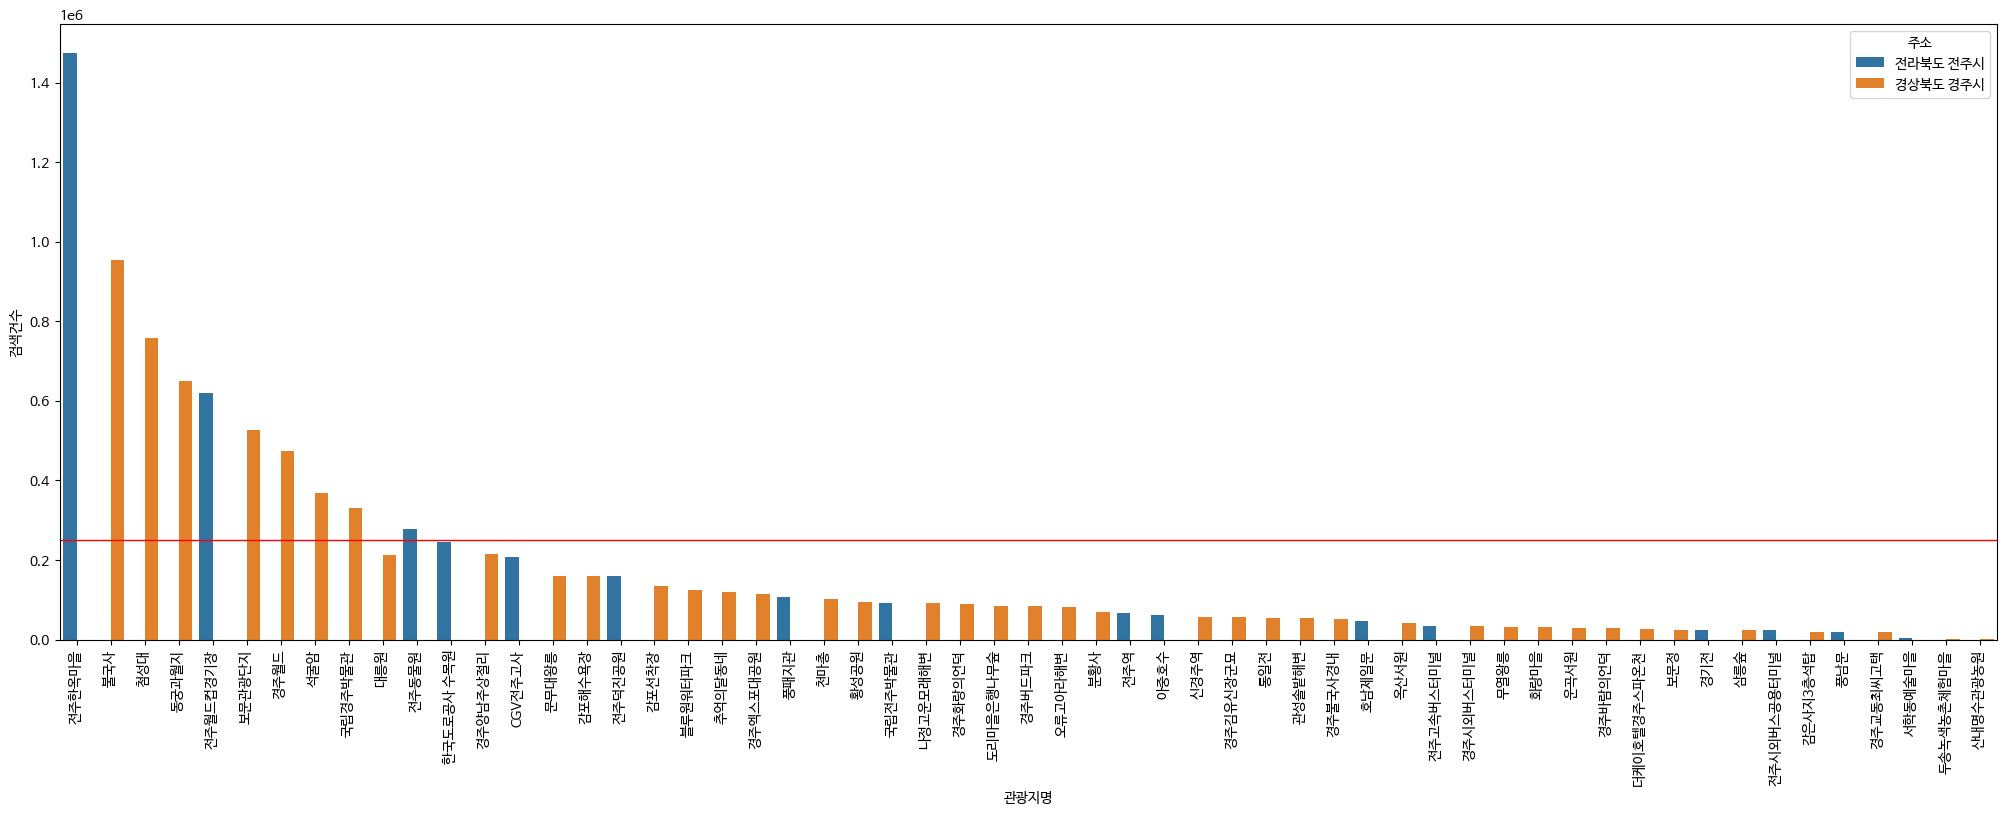

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(data=compare, x='관광지명', y='검색건수', hue='주소', ci=None)
plt.xticks(rotation=90)
plt.axhline(y=250000, color='r', linewidth=1)  # y값 250000에 가로선 그리기
plt.show()

300위의 검색건수는 약 250000건으로 전라북도 전주시와 경상북도 경주시에서 300위 안에 위치하는 데이터는 총 10곳이 존재함
- 전주시 3곳
- 경주시 7곳